# Hyperparameter Tunning: RandomizedSearchCV and GridSearchCV.
 __This notebook aim to demostramte and implement the use of RandomizedSearchCV and GridSearchCv in Hyperparameter tunning__

In [1]:
# Building the base model

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

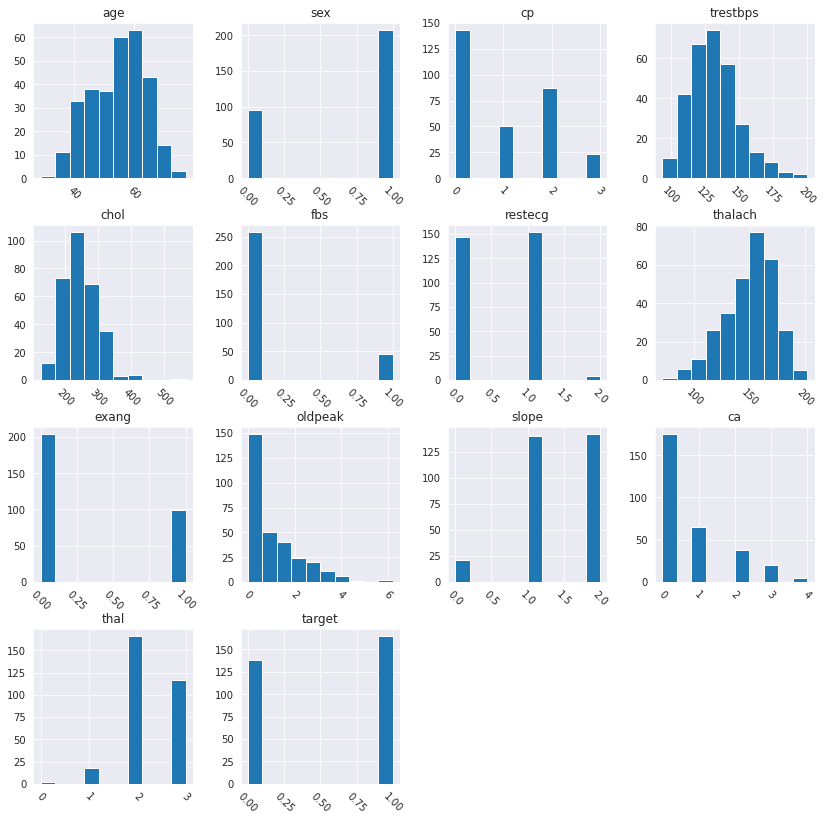

In [5]:
df.hist(figsize=(14,14), xrot=-45)
plt.show()

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
from sklearn.model_selection import train_test_split


In [8]:
# Create separate object for target and input features
y = df.target

X = df.drop('target', axis=1)


In [9]:
# split X and y into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.10, random_state=0)

In [10]:
# import the require algorithms needed to build model
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier(random_state=42)
dtclf.fit(x_train, y_train)
y_pred = dtclf.predict(x_test) # predictions
y_true = y_test # Trues values



In [11]:
# Evaluating our model
from sklearn.metrics import accuracy_score
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 dtclf.predict(x_train)), 2))

Train accuracy: 1.0


In [12]:
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))


Test accuracy: 0.71


In [13]:
# Evaluating using confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")


Test confusion_matrix


Text(33.0, 0.5, 'True')

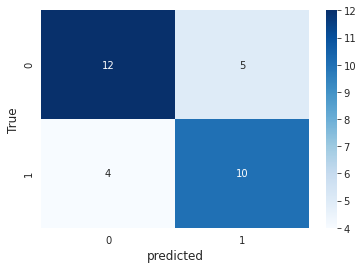

In [21]:
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

## Improving Model Using Grid Search

In [15]:
# let's measure execution  time too

import time

start = time.time()

# Defining 3 - dimensional hyperparameter space as a  python dictionary
hyperparameter_space = {'max_depth': [2,3,4,6,8,10.12,15,20],
                       'min_samples__leaf': [1,2,4,6,8,10,20,30],
                       'min_samples_split':[1,2,3,4,5,6,8,10]}

In [16]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(dtclf, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=0,
                        n_jobs=-1, cv=10, return_train_score=True)

In [17]:
rs.fit(x_train, y_train)
print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      rs.best_score_)
rs.best_estimator_.fit(x_train, y_train)
y_pred = rs.best_estimator_.predict(x_test) # Predictions
y_true = y_test # True values


ValueError: Invalid parameter min_samples for estimator DecisionTreeClassifier(min_samples_split=4, random_state=42). Check the list of available parameters with `estimator.get_params().keys()`.